In [66]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot
from sklearn.svm import SVC

In [70]:
#Read the data
df=pd.read_csv('news.csv')

#shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

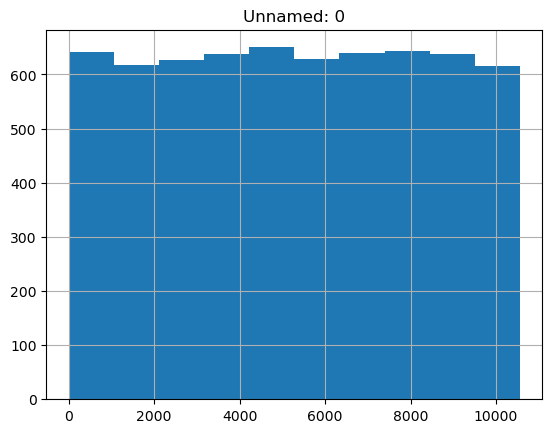

In [20]:
#Histogram
df.hist()
pyplot.show()

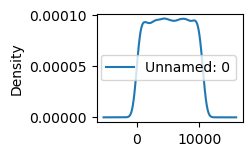

In [65]:
#Density plot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()


In [59]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [60]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [57]:
#SVM model
sv=SVC()
sv.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=sv.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [61]:
# confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[605,  33],
       [ 57, 572]], dtype=int64)

In [64]:
#evaluating an algorithm by classification report.

from sklearn.metrics import classification_report


x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
model = SVC()
model.fit(tfidf_train,y_train)
predicted = model.predict(tfidf_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93       638
        REAL       0.95      0.91      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

